In [2]:
import extract_paths
import matplotlib.pyplot as pyp

paths = extract_paths.load_paths('g21/matches/')

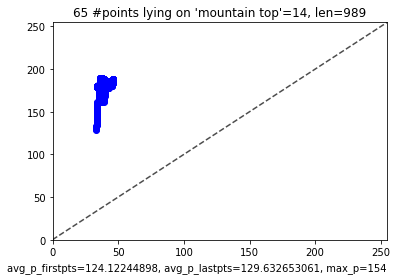

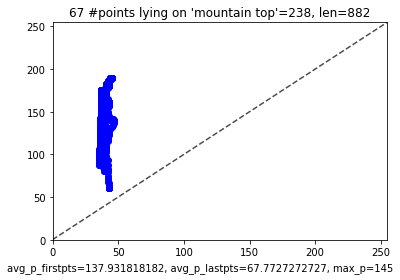

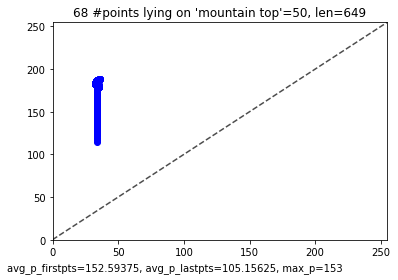

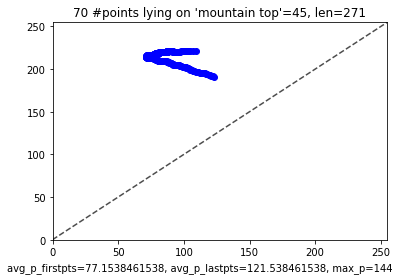

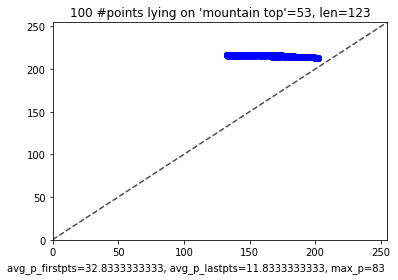

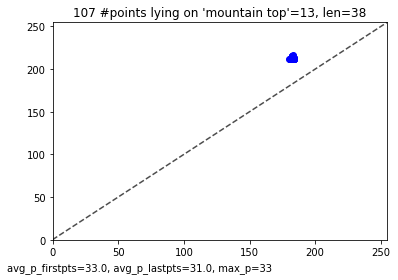

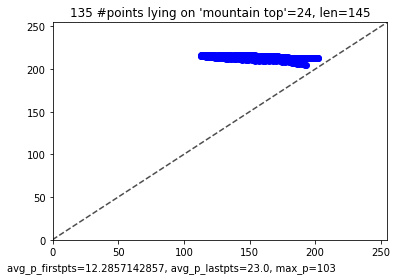

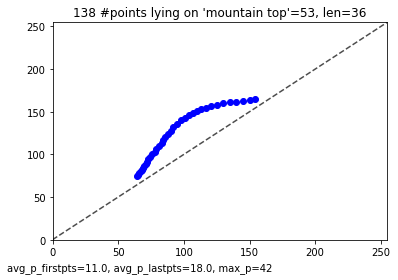

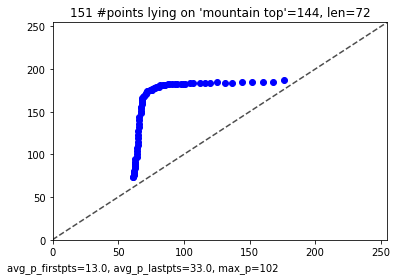

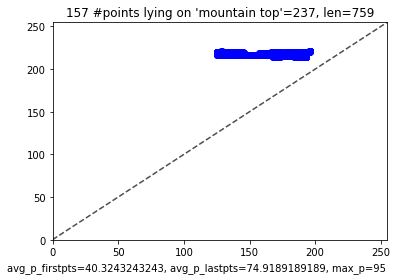

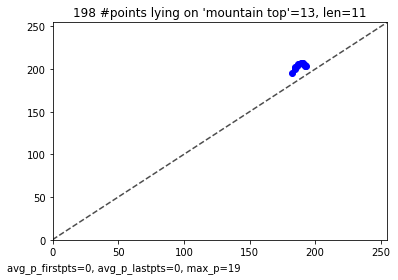

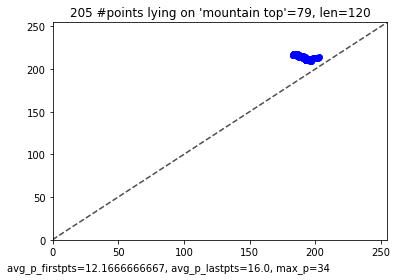

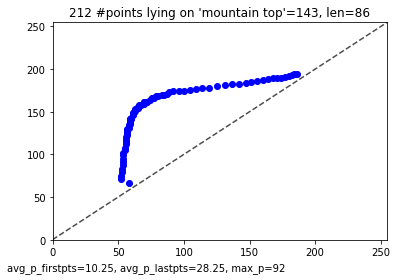

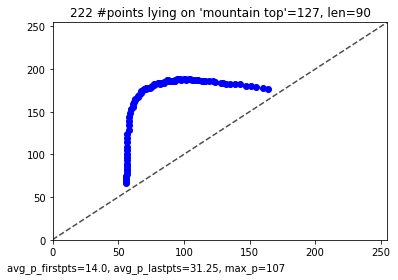

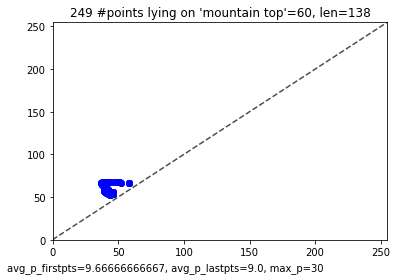

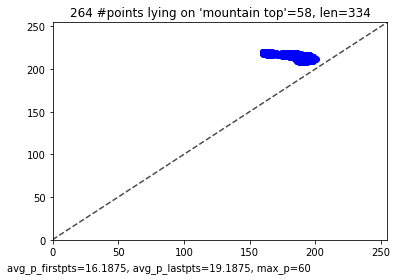

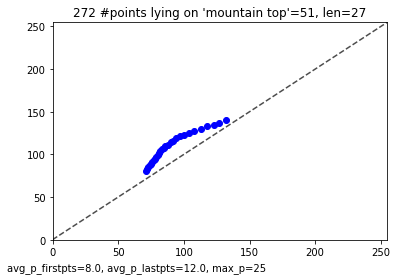

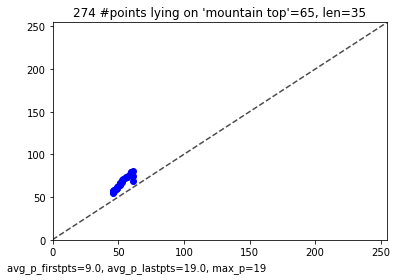

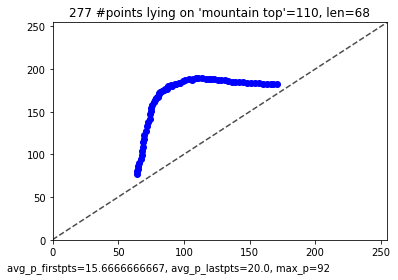

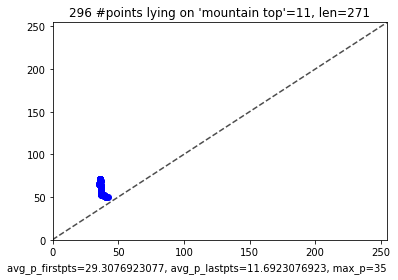

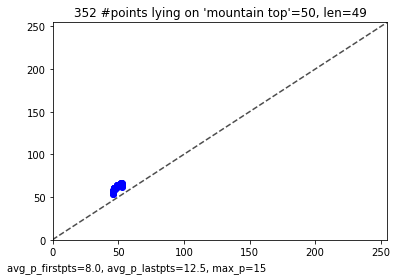

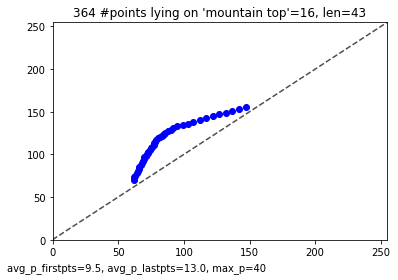

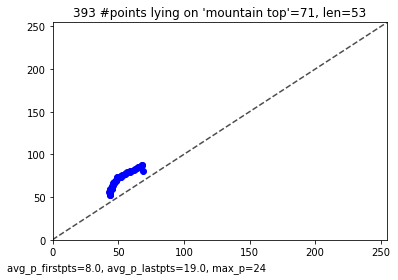

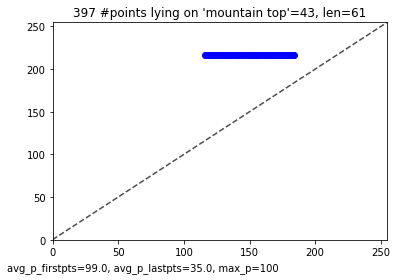

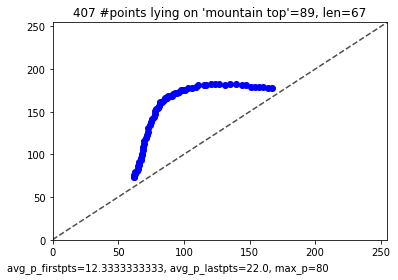

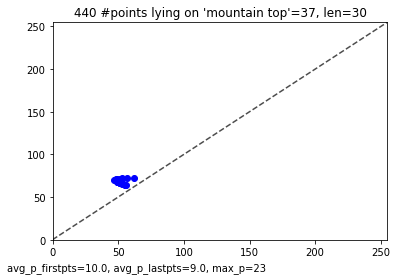

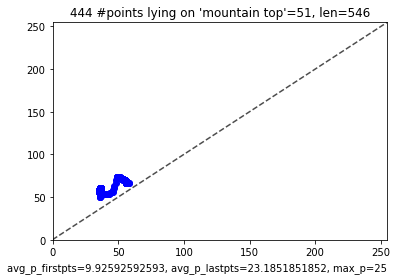

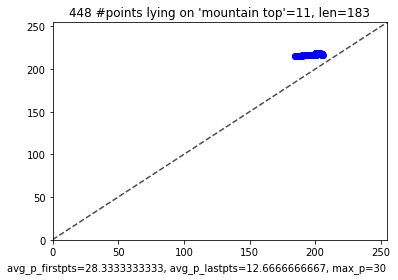

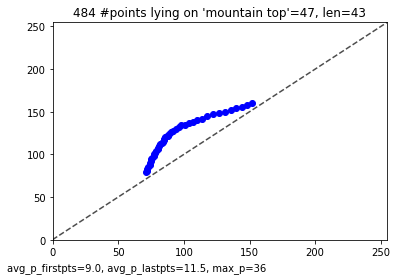

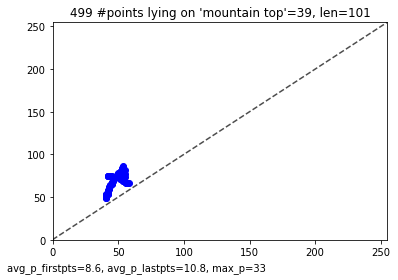

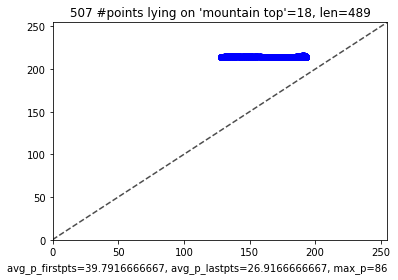

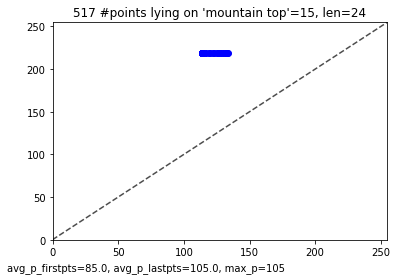

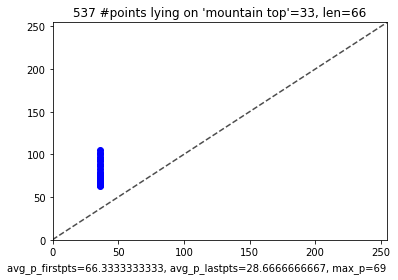

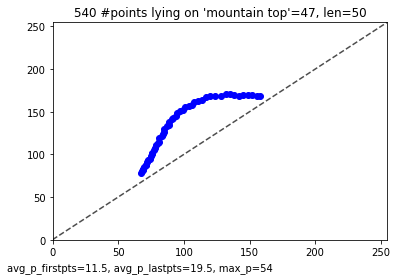

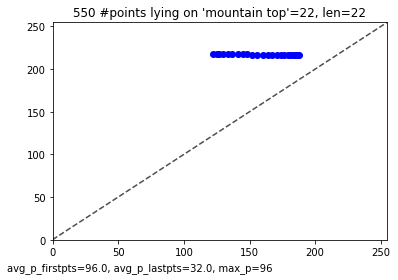

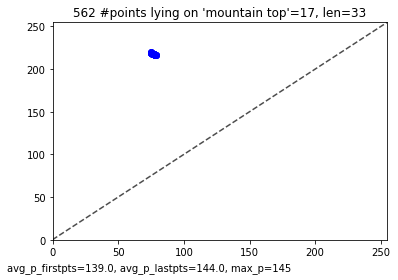

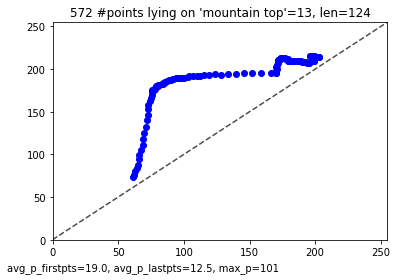

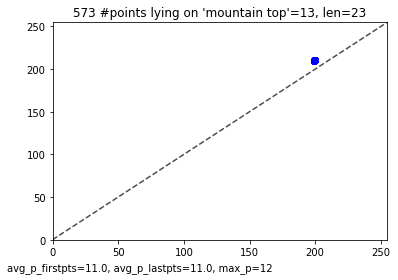

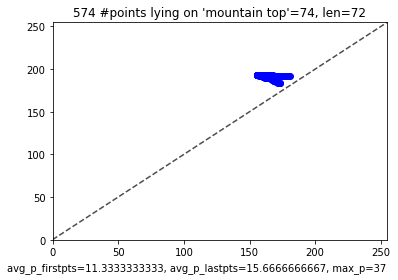

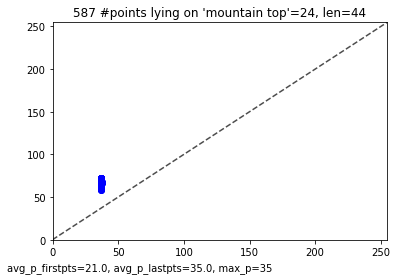

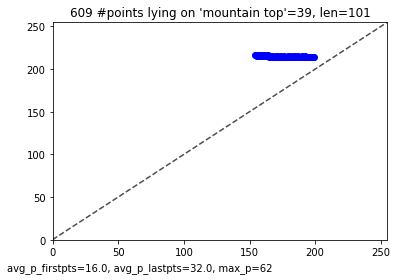

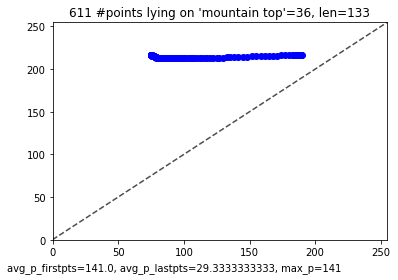

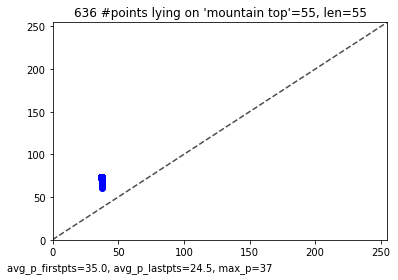

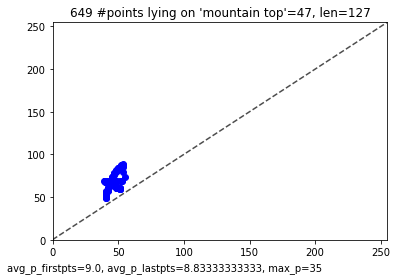

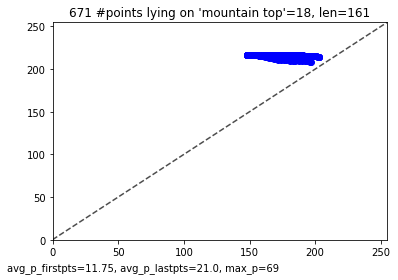

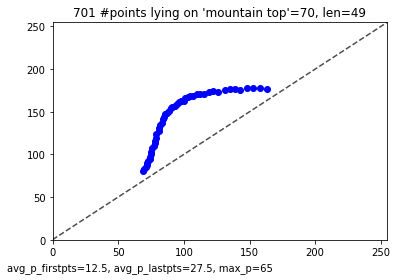

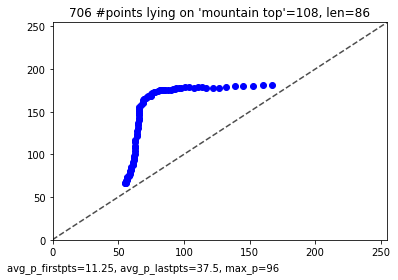

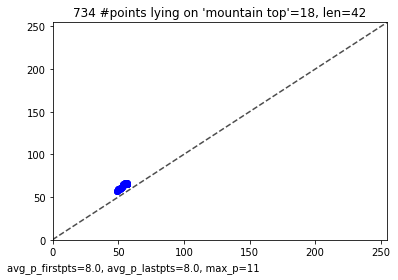

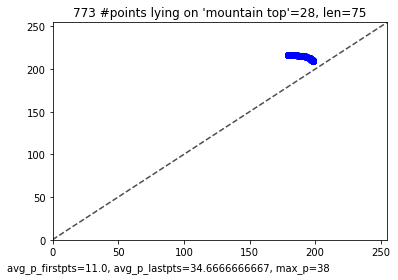

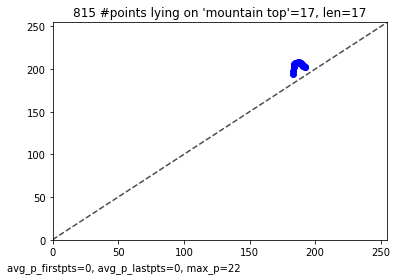

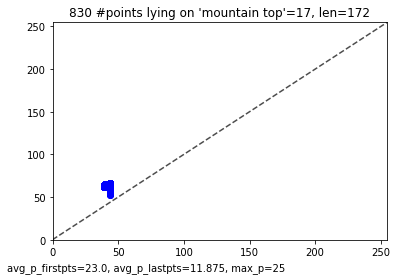

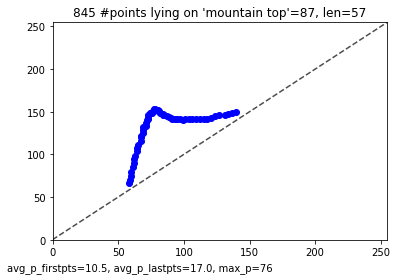

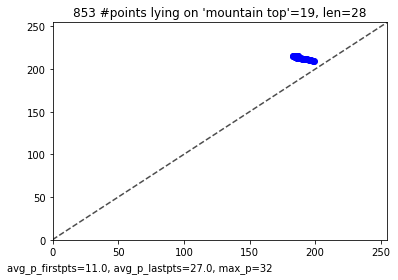

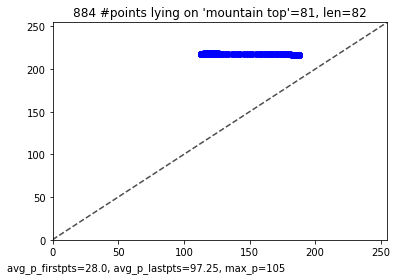

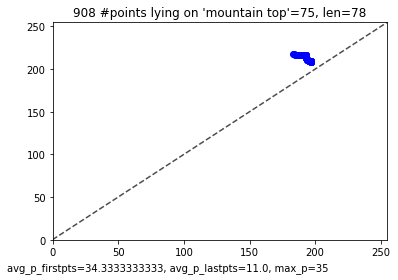

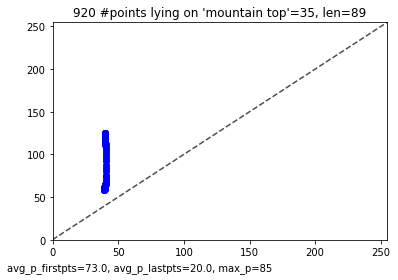

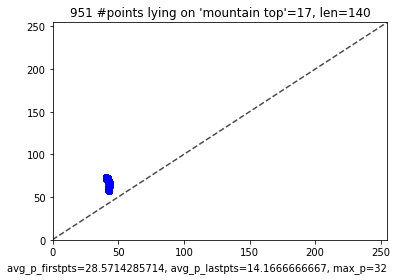

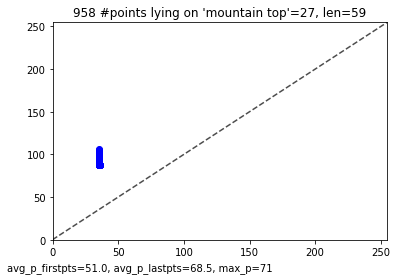

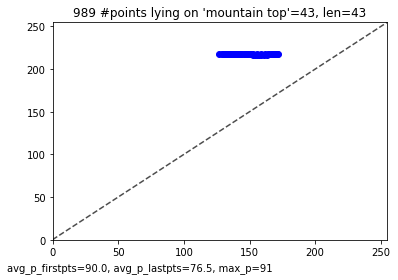

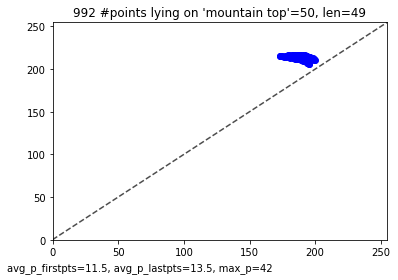

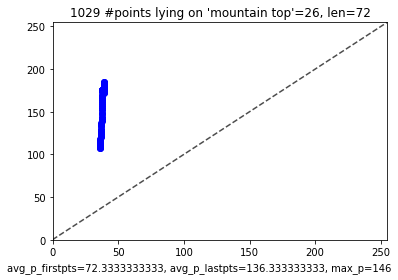

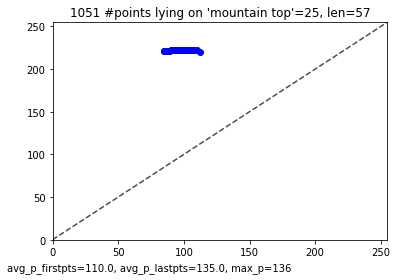

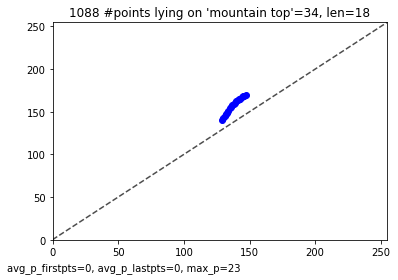

3290
63


In [34]:
from extract_paths import ind
import numpy as np

count = 0
countp = 0
for i in range(len(paths)):
    
    if( paths[i][ind('high_b_lyap')] + paths[i][ind('high_d_lyap')] > 10):
        count += paths[i][ind('high_b_lyap')] + paths[i][ind('high_d_lyap')]
        countp += 1
        #plots the path which picksup the vector
        pathlen = paths[i][2] - paths[i][1]
        pyp.title( (str)(i) + " #points lying on 'mountain top'=" + (str)(paths[i][ind('high_b_lyap')] + paths[i][ind('high_d_lyap')]) + ', len=' + (str)(pathlen))
        pyp.plot(paths[i][ind('birth')], paths[i][ind('death')], 'bo')
        pyp.figtext(.02, .02, "avg_p_firstpts=" + (str)(paths[i][ind('avg_p_firstpts')]) + ", avg_p_lastpts=" + (str)(paths[i][ind('avg_p_lastpts')]) + ", max_p=" + (str)(paths[i][ind('max_p')]))
        ax = pyp.gca()        
        ax.set_ylim([0,255])
        ax.set_xlim([0,255])
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        pyp.show()

print(count )
print(countp)

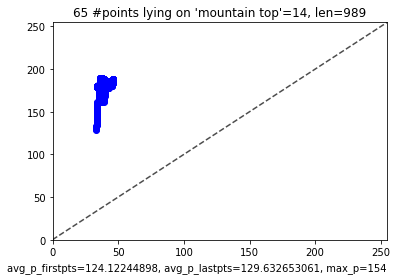

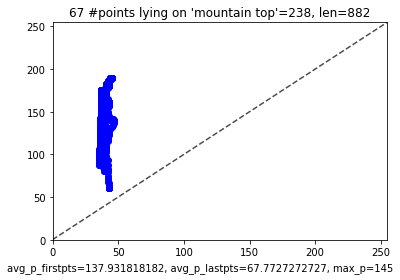

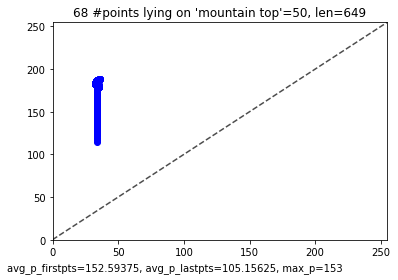

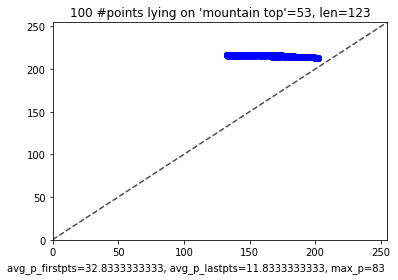

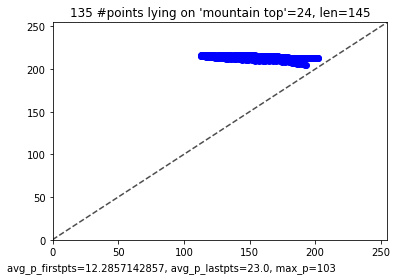

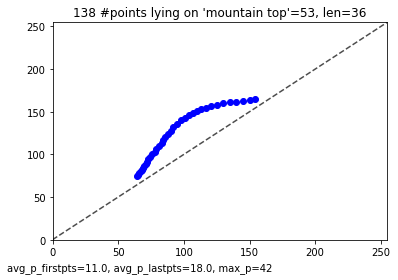

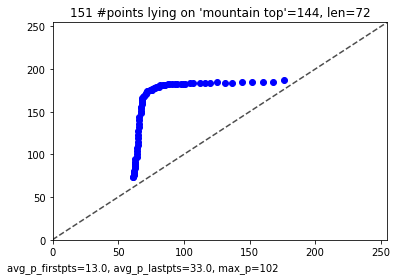

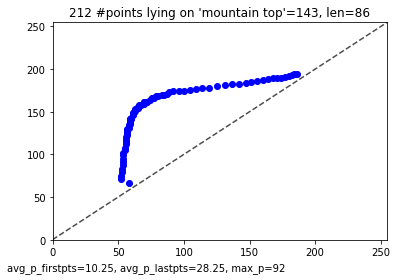

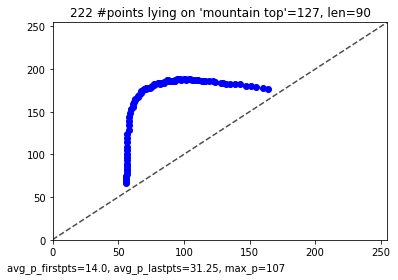

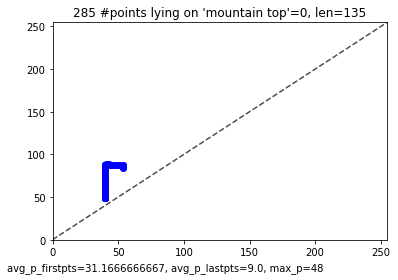

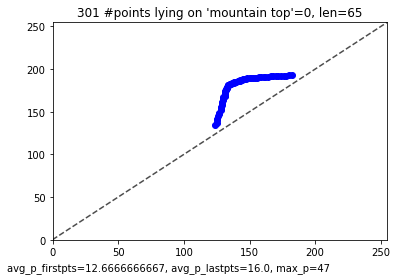

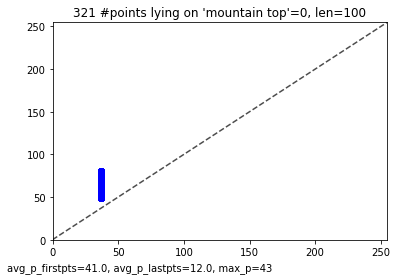

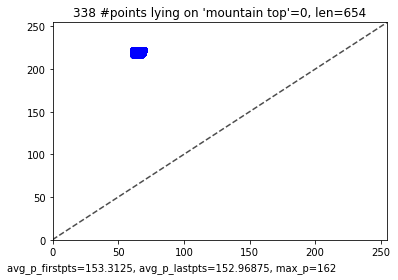

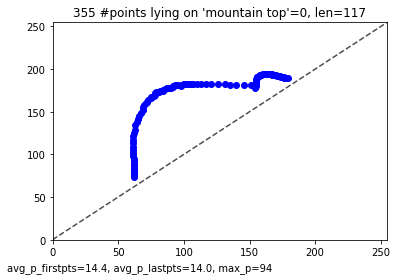

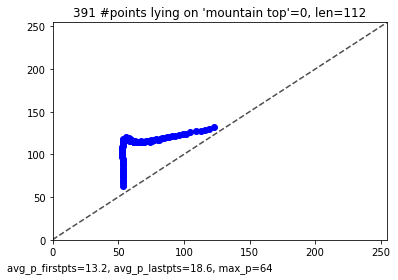

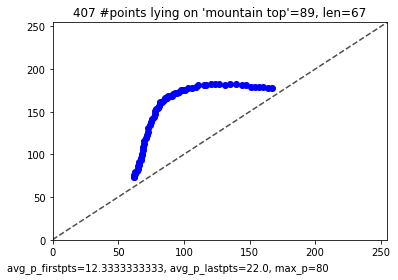

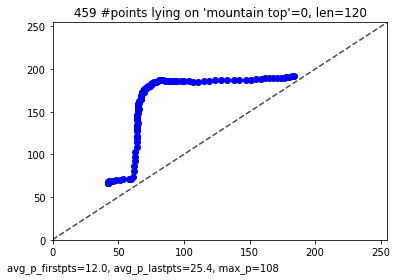

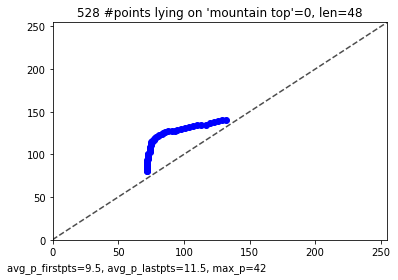

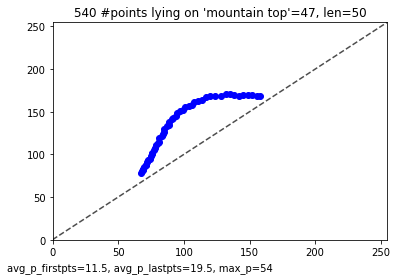

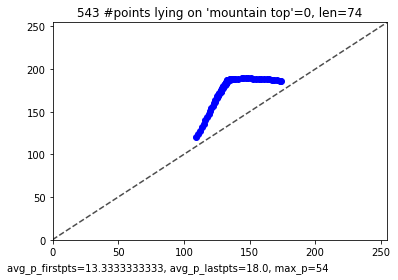

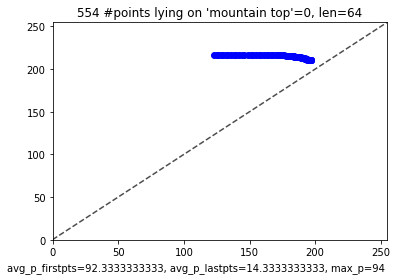

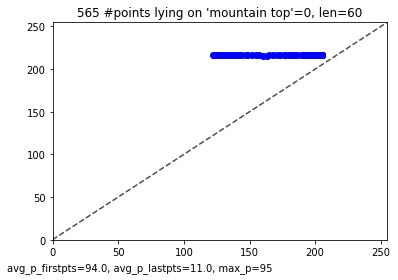

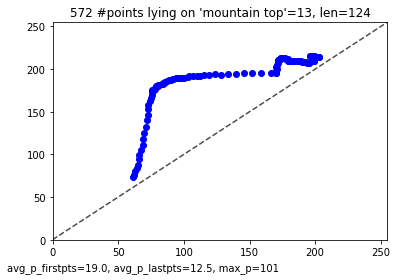

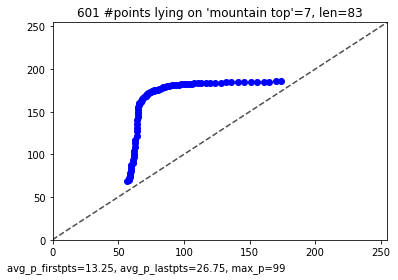

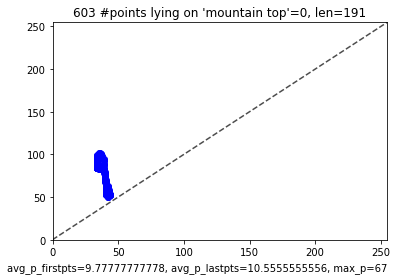

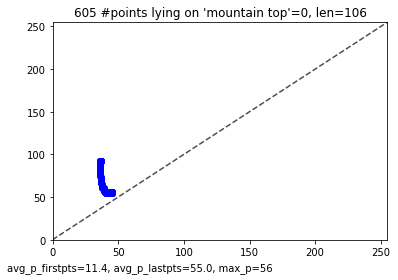

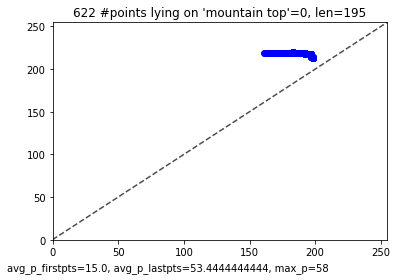

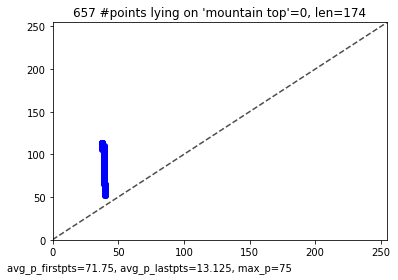

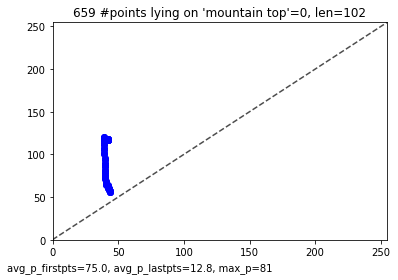

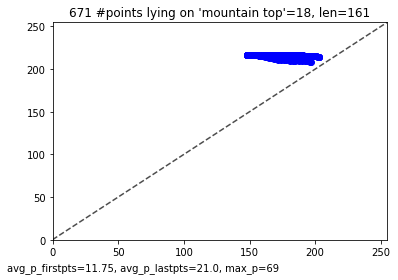

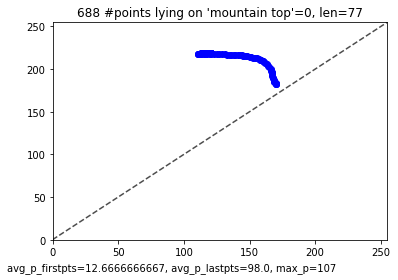

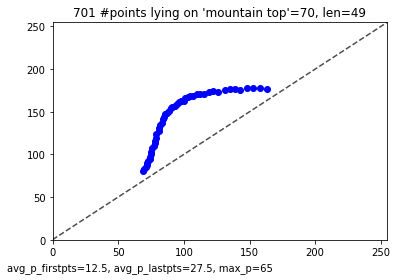

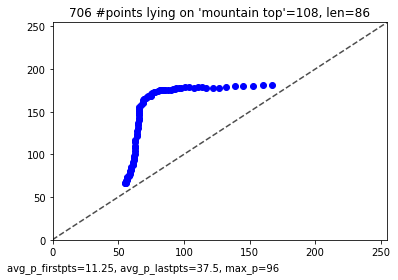

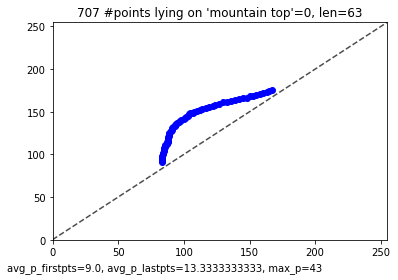

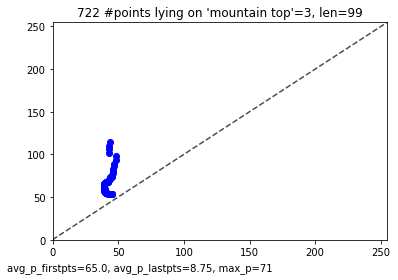

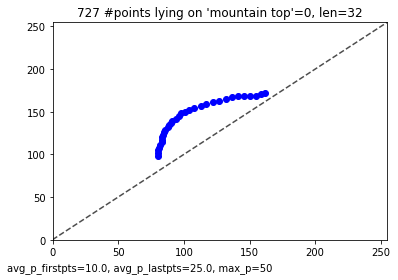

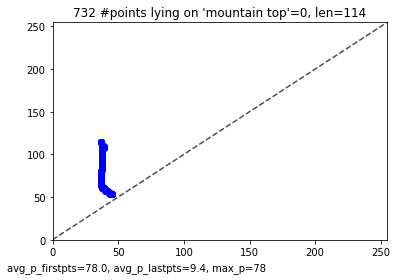

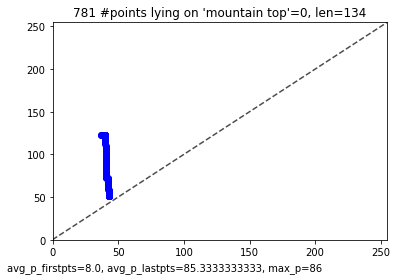

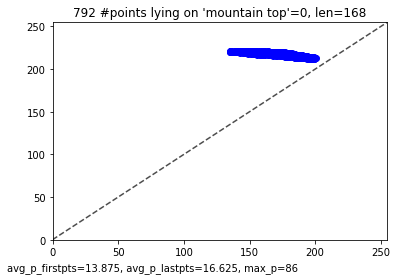

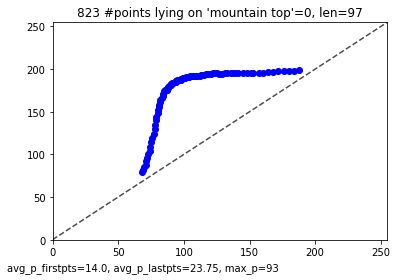

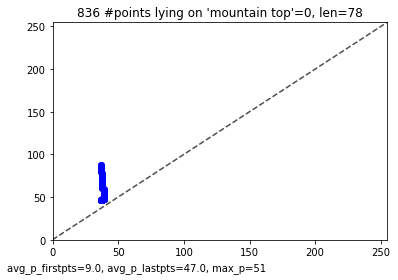

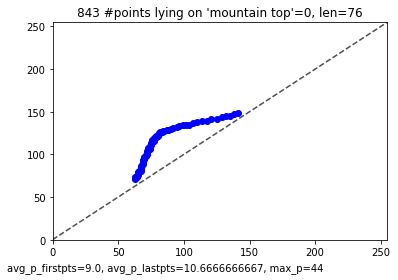

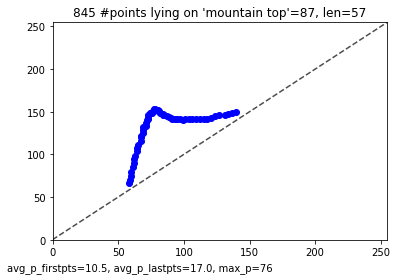

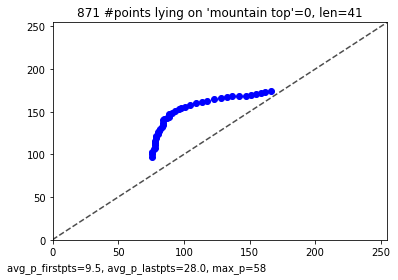

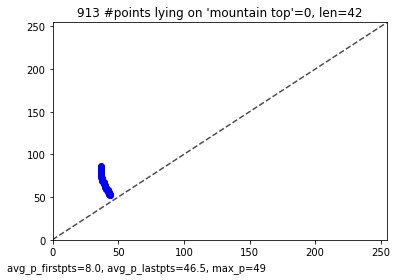

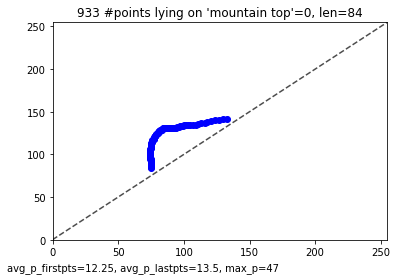

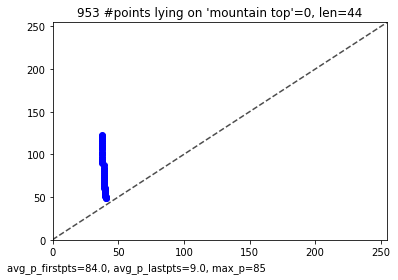

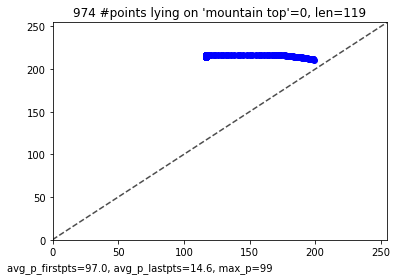

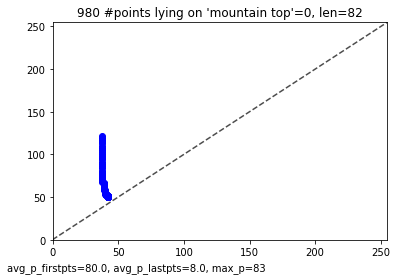

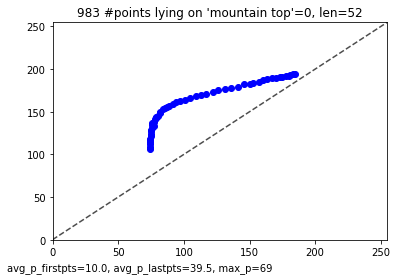

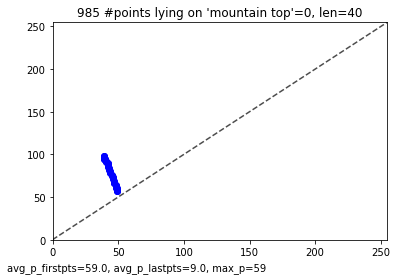

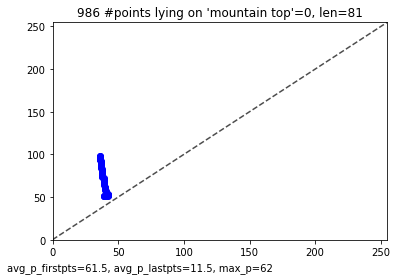

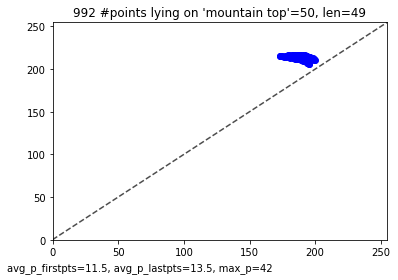

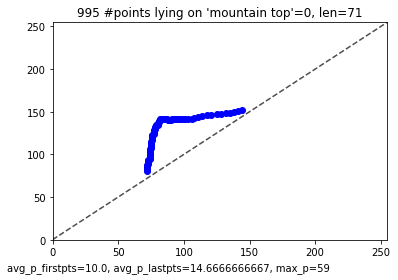

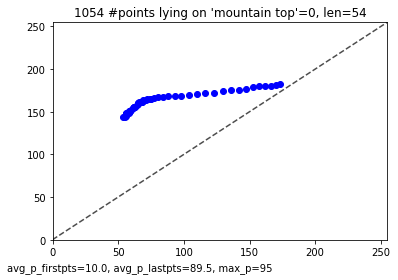

1338
19


In [33]:
#plots all paths satisfying certain characteristic

from extract_paths import ind
import numpy as np

count = 0
countp = 0
for i in range(len(paths)):
    #computes some statistics of the paths
    paths[i][ind('high_b_lyap')] = len( [x for x in paths[i][ind('b_lyap')] if x == 0] )
    paths[i][ind('high_d_lyap')] = len( [x for x in paths[i][ind('d_lyap')] if x == 0] )
    pathlen = paths[i][2] - paths[i][1]
    if( (int)(0.05*pathlen) > 0 ):
        paths[i][ind('avg_p_firstpts')] = np.average( ( np.array(paths[i][ind('death')]) - np.array(paths[i][ind('birth')]) )[0:(int)(0.05*pathlen)] )
    if( (int)(0.95*pathlen) < pathlen-1 ):
        paths[i][ind('avg_p_lastpts')] = np.average( ( np.array(paths[i][ind('death')]) - np.array(paths[i][ind('birth')]) )[(int)(0.95*pathlen):pathlen-1] )
    paths[i][ind('max_p')] = np.max( np.array(paths[i][ind('death')]) - np.array(paths[i][ind('birth')]) )
    paths[i][ind('avg_b')] = np.average( np.array(paths[i][ind('birth')]) )
    
    sat = (pathlen > 30 and (paths[i][ind('avg_p_firstpts')] <= 15 or paths[i][ind('avg_p_lastpts')] <= 15) and paths[i][ind('max_p')] > 40 and pathlen < 200) or (pathlen > 600 and paths[i][ind('max_p')] > 140)
    
    if( sat ):
        #plots the path which picksup the vector
        pyp.title((str)(i) + " #points lying on 'mountain top'=" + (str)(paths[i][ind('high_b_lyap')] + paths[i][ind('high_d_lyap')]) + ', len=' + (str)(pathlen))
        pyp.plot(paths[i][ind('birth')], paths[i][ind('death')], 'bo')
        pyp.figtext(.02, .02, "avg_p_firstpts=" + (str)(paths[i][ind('avg_p_firstpts')]) + ", avg_p_lastpts=" + (str)(paths[i][ind('avg_p_lastpts')]) + ", max_p=" + (str)(paths[i][ind('max_p')]))
        ax = pyp.gca()        
        ax.set_ylim([0,255])
        ax.set_xlim([0,255])
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        pyp.show()
    if(sat and paths[i][ind('high_b_lyap')] + paths[i][ind('high_d_lyap')] > 0):
        count += paths[i][ind('high_b_lyap')] + paths[i][ind('high_d_lyap')]
        countp += 1

print(count)
print(countp)    
